####**EDA**

Exploratory data analysis (EDA) is an essential initial step in data analysis that involves visual and statistical exploration of a dataset to gain insights, understand patterns, and identify trends, anomalies, and relationships between variables. This will help us understand the structure of the data, identify anomalies, and make informed decisions about subsequent analyzes or models. EDA is essential because it helps identify data quality issues, formulate hypotheses, select appropriate modeling techniques, and guide preprocessing steps, ultimately leading to more informed and accurate results.

We will transfer the categorical values to numerical values,
The GROUP and M/F columns are categorical and we will convert them to binary values.


In the 'M/F' column
 - F - 0
 - M - 1


In the 'Group' column
- Nondemented - 0
- Demented - 1

In [ ]:
alzheimers_data['M/F'] = alzheimers_data['M/F'].replace(["F","M"], [0,1])
alzheimers_data['Group'] = alzheimers_data['Group'].replace(["Nondemented", "Demented"], [0,1])

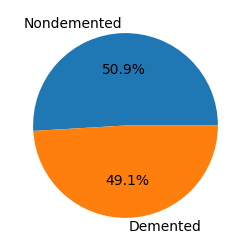

In [ ]:
plt.figure(figsize=(3,3))
plt.pie(alzheimers_data['Group'].value_counts(),labels=['Nondemented','Demented'],autopct='%1.1f%%')
plt.title('')
plt.show()

<Axes: xlabel='Group', ylabel='count'>

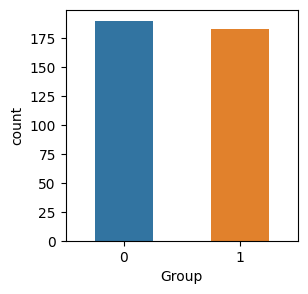

In [ ]:
plt.figure(figsize=(3, 3))
sns.countplot(x="Group",data= alzheimers_data,width=0.5)

Amazing!! We see that the number of demented and non-demented is almost the same

We will examine the effect of each feature on the classification. In the category columns we will use countplot visualization.

In [ ]:
categorical_columns = ["CDR", "M/F", "SES"]
numerical_columns = ['Age', 'EDUC', 'MMSE', 'eTIV', 'nWBV', 'ASF']

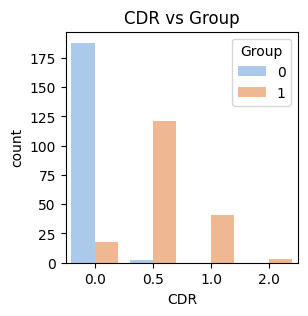

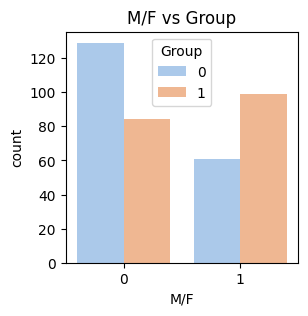

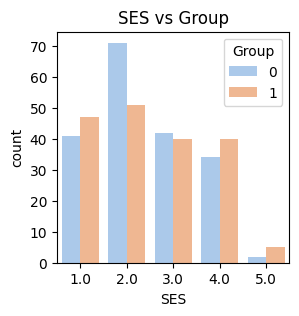

In [ ]:
for column in categorical_columns:
    plt.figure(figsize=(3,3))
    ax = sns.countplot(x=column, hue='Group', data=alzheimers_data, palette='pastel')
    plt.title(f"{column} vs Group")
    plt.show()

We see that CDR divides CLASS almost perfectly.

The assessment of functional capacity is a significant component in the diagnosis of various degenerative diseases, and in addition, it has a central role in the consequences for the treatment that will be given to the patient and the assessment of the support he needs. One of the questionnaires is the CDR questionnaire which helps in the characterization and assessment of the patient's cognitive and functional abilities to help diagnose different types of dementia, with an emphasis on Alzheimer's disease.

In fact, CDR is one of the most important elements in Alzheimer's detection and that is why it alone manages to classify so well.
Therefore, it will probably be quite easy to work on this basis to achieve good results. And we see this in the first diagram. And so we would like to focus on the other features and see how they inform the detection of Alzheimer's.

Therefore we will omit this column

In [ ]:
alzheimers_data = alzheimers_data.drop(['CDR'], axis=1)

We see that the majority of women are not demented and the opposite is true for men. That is, the M/F attribute affects the classification class.

Even in education, we can see that grades 1, 4 and 5 have more demented than fully demented, but not in high percentages, on the other hand, in grades 2, 3, the non-demented are much more than the demented.

We cannot run countplot on the numerical continuous values, so we will run a visualization on them - kernel density plots that provide a smoothed estimate of the probability density function of the data. The resulting curves will give us a clear view of how the data is distributed within each department.

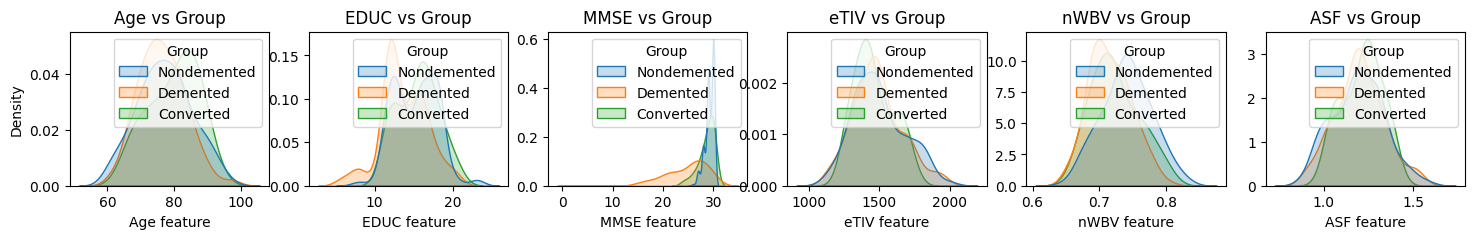

In [ ]:
num_plots = len(numerical_columns)
num_cols = num_plots
num_rows = 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 2))
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=alzheimers_data, x=column, hue='Group', common_norm=False, fill=True, ax=axes[i])
    axes[i].set_title(f"{column} vs {'Group'}")
    axes[i].set_xlabel(f"{column} feature")
    axes[i].set_ylabel('Density')
    if(i!=0):
      axes[i].set_ylabel('')

    handles, labels = axes[0].get_legend_handles_labels()
    if handles and labels:
      fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(1, -0.5), ncol=len(labels))
      plt.tight_layout()
      plt.subplots_adjust(bottom=0.1)
      plt.show()

**Age Distribution**:

Upon analyzing the age distribution, we observe interesting trends. The number of non-demented individuals seems to be slightly higher than that of demented individuals at the age ranges of 50-65 and 85-100. Conversely, between the ages of 65-85, we notice a slight predominance of demented individuals. These variations in distribution across age ranges could indicate potential relationships between age and dementia.

**MMSE Feature**:

The MMSE feature provides particularly valuable insights. A certain threshold setting appears to be effective in distinguishing non-demented individuals. This suggests that there exists a critical MMSE value beyond which individuals are highly likely to be classified as non-demented. This finding could serve as a crucial criterion for identifying non-demented cases accurately.

**Feature Comparison**:

Upon examining other features, no distinct patterns emerge that would directly contribute to classifying the data.


#####Finding correlations between features

We will try to see a correlation between the variables by visualization.
Let's see which of the variables we see a good separation.

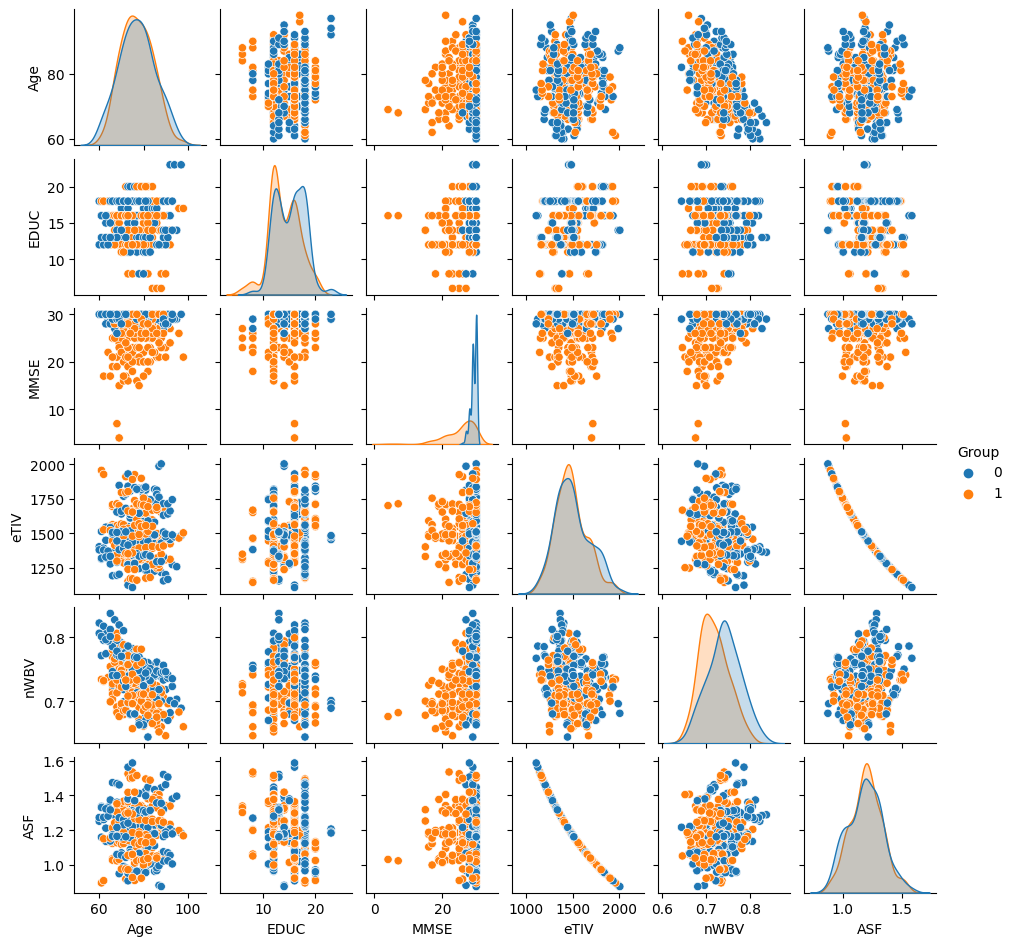

In [ ]:
alzheimers_data_numeric = alzheimers_data[numerical_columns + ['Group']]

sns.pairplot(alzheimers_data_numeric, hue='Group', height=1.6)
plt.show()


We examine all the combinations we received from the numerical columns. We see pretty good separation in all combinations that have MMSE as one of the features.
In all other combinations there is no good separation at all.
Side note: And so once again we come to the conclusion that the MMSE feature is one of the most decisive features here.

The combinations we received and would like to examine them in depth after this:
 - MMSE - Age
 - MMSE - EDUC
 - MMSE - eTIV
 - MMSE - nWBV
 - MMSE - ASF


After we have an intuitive perception of the distribution of the data in
the feature space. We will use a heat map to build a correlation map.

First, we calculate the correlation coefficients between all pairs of features. The correlation coefficient indicates the strength and direction of the linear relationship between two coefficients using the Pearson correlation coefficient.

Each cell in the heatmap represented the correlation between two features, with colors representing the strength of the correlation.

We will use the 'RdYlBu' colormap which offers a distinct and contrasting color representation. therefore improves the clarity and intuitiveness of the heat map, and makes it easier for us to identify the meaning of the strength of the correlations between variables.

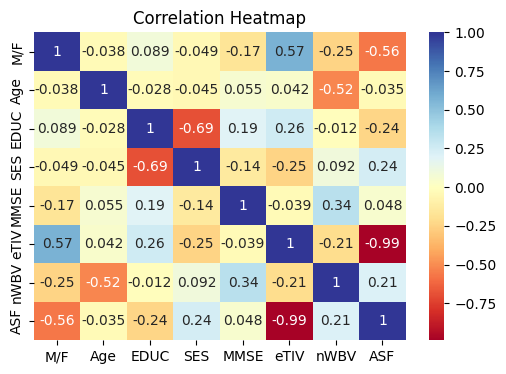

In [ ]:
alzheimers_data_without_Group = alzheimers_data.drop('Group', axis=1)

correlation_matrix = alzheimers_data_without_Group.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, cmap = 'RdYlBu', annot=True, center=0)
plt.title("Correlation Heatmap")
plt.show()

The strength of correlation is typically assessed based on the absolute value of the correlation coefficient.

- The correlation coefficient can range from -1 to 1, where:
  - -1: Perfect negative correlation (as one variable increases, the other decreases)
  -  0: No correlation
  - 1: Perfect positive correlation (as one variable increases, the other also increases)
- In terms of interpreting the absolute value of the correlation coefficient:

  - 0 to 0.3: Weak correlation
  - 0.3 to 0.7: Moderate correlation
  - 0.7 to 1: Strong correlation

The strongest connections sorted in descending order are:


1.   eTIV - ASF
2.   SES - EDUC

which is very interesting because in pairplot we did not see these connections, and in contrast other connections found in pairplot were not reflected in the heat map.




We will check the connections we received. They have very strong ties. If we look for example at the pair eTIV - ASF that received a match of 0.99, it seems that these features are similar to each other. Therefore, one of them can be abandoned, since it does not contribute any additional value to the classifier.

######**eTIV - ASF**

Let's refresh what these 2 indicators mean. These indicators assist in identifying regions of the brain that have been affected by Alzheimer's disease, thereby revealing the extent of cellular damage and allowing for an assessment of the stage of Alzheimer's progression.

- eTIV - Estimated Total Intracranial Volume: This indicator refers to the estimation of the total volume within the skull, encompassing the brain and cerebrospinal fluid. It serves as a reference measurement and aids in normalizing other brain-related measurements.

- ASF - Atlas Scaling Factor: This indicator is used to adjust brain images to a standardized anatomical template, facilitating comparison and analysis. It plays a role in aligning brain structures across different individuals and images.

Together, these indicators provide crucial insights for healthcare professionals to pinpoint areas of brain tissue loss caused by Alzheimer's disease. By examining eTIV and ASF values, medical experts can determine the stage of Alzheimer's progression and assess the severity of cellular deterioration


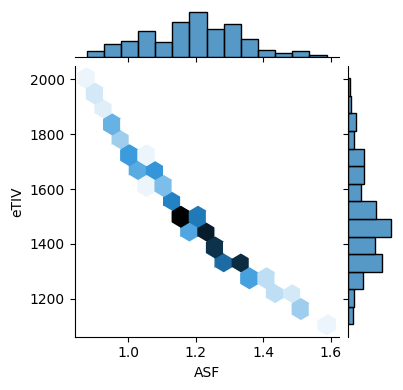

In [ ]:
sns.jointplot(x=alzheimers_data['ASF'], y=alzheimers_data['eTIV'], kind="hex", height=4)

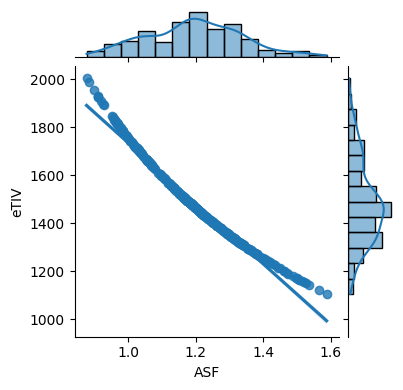

In [ ]:
sns.jointplot(x=alzheimers_data['ASF'], y=alzheimers_data['eTIV'], kind="reg", height=4)

Cool! Wow! You see in the graph a crazy match!!!!
We therefore conclude that one of the two features should be omitted.


######**SES - EDUC**

Let's recall the meaning of the features:

Education level - EDUC

Socio-economic status - SES

Not surprising at all and even quite expected to get a match between the above qualities. The relationship between education and the economic situation is quite well known and has even been extensively researched.
According to a study conducted by Dr. Yoav Friedman and Roni Frisch, [ הקשר בין השכלה לשכר](https://news.walla.co.il/item/1342819) in which it was found that:

Among Jewish students, the chance of a student from a family from the lower median to complete a bachelor's degree is 6% lower than that of a student with similar achievements in the matriculation exam, who grew up in a family from the upper quartile. From a similar comparison among Jewish girls a gap of 7.8% was found.

We will try to see the strength of the connection in the jointplot visualization to see the connection.

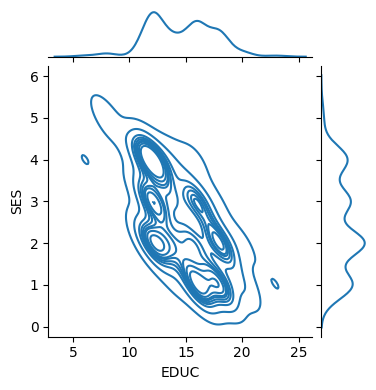

In [ ]:
sns.jointplot(x=alzheimers_data['EDUC'], y=alzheimers_data['SES'], kind="kde", height=4)

It seems that the connection is not too strong.
We will continue to examine it. Let's see what the average education is for each socio-economic status.

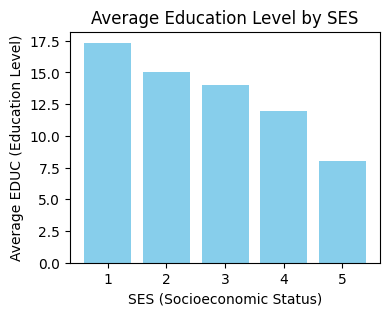

In [ ]:
ses_avg_educ = alzheimers_data.groupby('SES')['EDUC'].mean().reset_index()

plt.figure(figsize=(4, 3))
plt.bar(ses_avg_educ['SES'], ses_avg_educ['EDUC'], color='skyblue')
plt.xlabel('SES (Socioeconomic Status)')
plt.ylabel('Average EDUC (Education Level)')
plt.title('Average Education Level by SES')
plt.show()

The better the socioeconomic situation, the higher the average years of education. There is some degree of correlation, but not enough to omit one of these columns.

#####Noise reduction by clustering

We will check with DBSCAN which points are defined as noise. But we will standardize the data. Because when features have different scales, some features may dominate others in terms of impact on model predictions. This can lead to suboptimal model performance and slower convergence. The normalization of the features ensures that they all contribute equally to the learning process of the model.

This way we will get an adjusted range where all the features will be in the range between -1 to 1.

In [ ]:
alzheimers_data_without_Group = alzheimers_data.drop('Group', axis=1)

# we standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(alzheimers_data_without_Group)

eps = 2.4
min_samples = 10
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_scaled)

# We identify outliers (points with label -1)
outliers = np.where(labels == -1)[0]

unique_labels = np.unique(labels)
unique_clusters = unique_labels[unique_labels != -1]
num_clusters = len(unique_clusters)
print(f"The number of clusters identified by DBSCAN is: {num_clusters}")

alzheimers_data_without_Group['Cluster_Labels'] = -1
alzheimers_data_without_Group.loc[labels != -1, 'Cluster_Labels'] = labels[labels != -1]
outlier_data = alzheimers_data_without_Group.iloc[outliers]
print(outlier_data)

The number of clusters identified by DBSCAN is: 1
     M/F  Age  EDUC  SES  MMSE  eTIV   nWBV    ASF  Cluster_Labels
78     1   84     6  4.0  25.0  1310  0.727  1.339              -1
79     1   86     6  4.0  27.0  1320  0.724  1.329              -1
80     1   88     6  4.0  23.0  1348  0.713  1.302              -1
100    1   68    16  1.0   7.0  1714  0.682  1.024              -1
101    1   69    16  1.0   4.0  1701  0.676  1.032              -1
162    0   75     8  5.0  22.0  1143  0.741  1.535              -1


It shows us 6 points as noisy points. Let's see it visually:

In [ ]:
fig = px.scatter_3d(alzheimers_data_without_Group, x='MMSE', y='Age', z='eTIV', color='Cluster_Labels', hover_name='Cluster_Labels')
fig.show()

We will remove the noisy points.

In [ ]:
mask = ~alzheimers_data.index.isin(outliers)
alzheimers_data = alzheimers_data[mask]
alzheimers_data_without_Group = alzheimers_data_without_Group[alzheimers_data_without_Group['Cluster_Labels'] != -1]
alzheimers_data_without_Group = alzheimers_data_without_Group.drop(['Cluster_Labels'], axis=1)

alzheimers_data_without_Group.reset_index(drop=True, inplace=True)
alzheimers_data.reset_index(drop=True, inplace=True)
alzheimers_data

,Group,M/F,Age,EDUC,SES,MMSE,eTIV,nWBV,ASF
0,0,1,87,14,2.0,27.0,1987,0.696,0.883
1,0,1,88,14,2.0,30.0,2004,0.681,0.876
2,1,1,75,12,2.0,23.0,1678,0.736,1.046
3,1,1,76,12,2.0,28.0,1738,0.713,1.010
4,1,1,80,12,2.0,22.0,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...
362,1,1,82,16,1.0,28.0,1693,0.694,1.037
363,1,1,86,16,1.0,26.0,1688,0.675,1.040
364,0,0,61,13,2.0,30.0,1319,0.801,1.331
365,0,0,63,13,2.0,30.0,1327,0.796,1.323
